In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

In [2]:
df= pd.read_csv('oec.csv')

In [3]:
sns.set(style='darkgrid')
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [4]:
data = df.PlanetaryMassJpt.dropna()

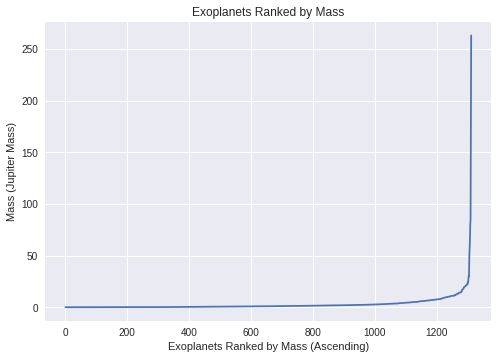

In [5]:
plt.plot(data.sort_values().reset_index().PlanetaryMassJpt);
plt.title('Exoplanets Ranked by Mass');
plt.ylabel('Mass (Jupiter Mass)');
plt.xlabel('Exoplanets Ranked by Mass (Ascending)')

In [6]:
hist_data = pd.Series(index=data.index)

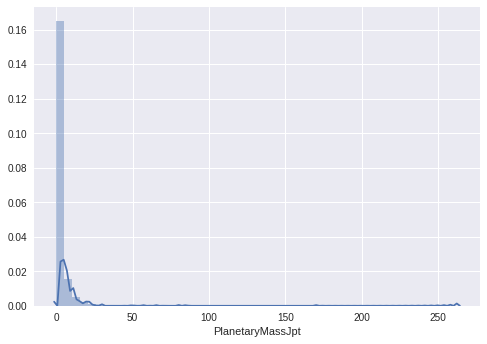

In [7]:
for i, size in enumerate(data):
    if size > 5:
        hist_data.iloc[i] = 5
    else:
        hist_data.iloc[i] = size

sns.distplot(data, kde=True, rug=False);

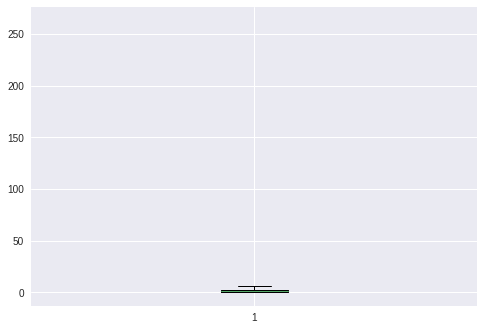

In [8]:
plt.boxplot(data);

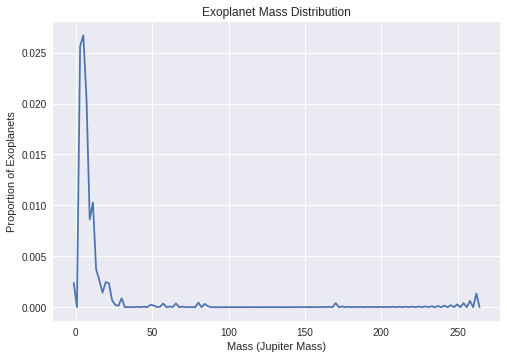

In [9]:
g = sns.kdeplot(data, legend=False)
g.set_title('Exoplanet Mass Distribution');
g.set_xlabel('Mass (Jupiter Mass)');
g.set_ylabel('Proportion of Exoplanets')

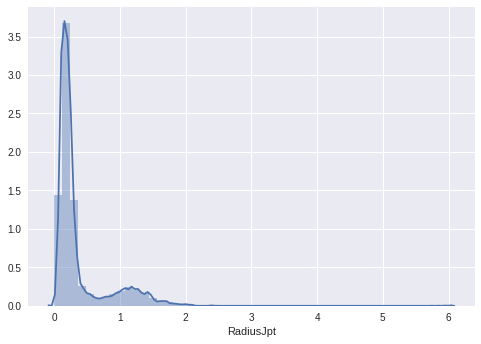

In [10]:
sns.distplot(df.RadiusJpt.dropna());

In [11]:
mass = scipy.stats.mstats.winsorize(df.PlanetaryMassJpt, limits=0.1)

In [12]:
radius = scipy.stats.mstats.winsorize(df.RadiusJpt, limits=0.1)

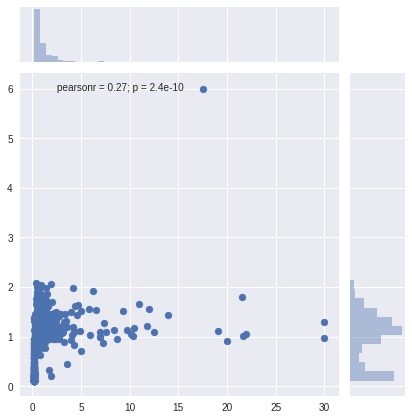

In [13]:
sns.jointplot(mass, radius);

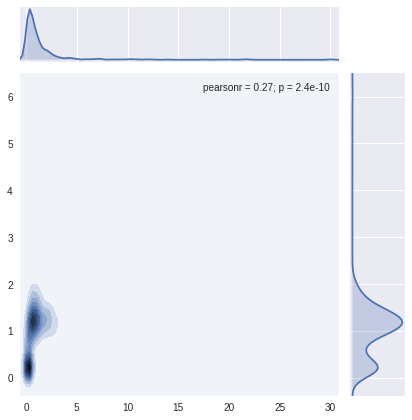

In [14]:
sns.jointplot(mass, radius, kind="kde");

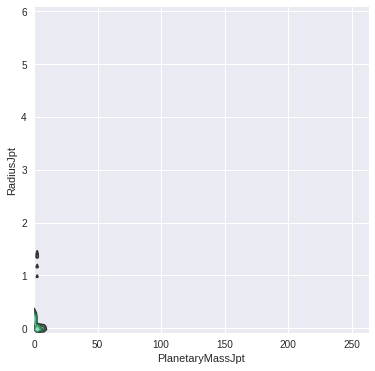

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.fillna(0).PlanetaryMassJpt, df.fillna(0).RadiusJpt);
#sns.rugplot(mass, color="g", ax=ax)
#sns.rugplot(radius, vertical=True, ax=ax);